In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data=pd.read_csv('./data/pima.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,None,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,None,40,35,168,43.1,2.288,33,1


In [3]:
data[1]=data[1].map(lambda x:np.nan if str(x)=='None' else x)
data.dropna(subset=[1],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       763 non-null    int64  
 1   1       763 non-null    object 
 2   2       763 non-null    int64  
 3   3       763 non-null    int64  
 4   4       763 non-null    int64  
 5   5       763 non-null    float64
 6   6       763 non-null    float64
 7   7       763 non-null    int64  
 8   8       763 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 59.6+ KB


In [4]:
data[1]=data[1].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       763 non-null    int64  
 1   1       763 non-null    int64  
 2   2       763 non-null    int64  
 3   3       763 non-null    int64  
 4   4       763 non-null    int64  
 5   5       763 non-null    float64
 6   6       763 non-null    float64
 7   7       763 non-null    int64  
 8   8       763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


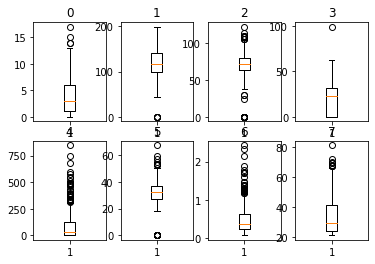

In [5]:
data.describe()
cnt=data.shape[1]-1
for i in range(cnt):
    plt.subplot(2,4,i+1)
    plt.boxplot(data[i])
    plt.title(str(i))
plt.show()
    

In [6]:
data.shape

(763, 9)

In [7]:
data=data[(data[3]<80) & (data[2]>0) & (data[5]>0)]

data.shape

(723, 9)

In [8]:
data.corr()[8].abs().sort_values()


3    0.082949
4    0.139693
2    0.181940
6    0.186842
0    0.234530
7    0.248610
5    0.305765
1    0.457313
8    1.000000
Name: 8, dtype: float64

In [9]:
y=data[8]
x=data.drop(8,axis=1)
pca=PCA(n_components=7)
x.shape
y.shape

(723,)

### 统计空准确率

In [10]:
y.value_counts(normalize=True)

0    0.659751
1    0.340249
Name: 8, dtype: float64

In [11]:
x_pca=pca.fit_transform(x)
x_pca.shape

(723, 7)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)

In [13]:
for i in range(2,20):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_std,y_train)
    score=knn_model.score(X_test_std,y_test)
    print(score,i)

0.696551724137931 2
0.7448275862068966 3
0.7379310344827587 4
0.7655172413793103 5
0.7655172413793103 6
0.7724137931034483 7
0.7655172413793103 8
0.7586206896551724 9
0.7586206896551724 10
0.7724137931034483 11
0.7724137931034483 12
0.7793103448275862 13
0.7517241379310344 14
0.7379310344827587 15
0.7448275862068966 16
0.7310344827586207 17
0.7517241379310344 18
0.7586206896551724 19


### svm

In [14]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)

for i  in [1,10]:
    for k in ['linear','poly','rbf']:
        svc_model=SVC(C=i,kernel=k)
        svc_model.fit(X_train,y_train)
        score = svc_model.score(X_test, y_test)
        print(score,i,k)


0.7448275862068966 1 linear
0.7172413793103448 1 poly
0.7517241379310344 1 rbf
0.7517241379310344 10 linear
0.7310344827586207 10 poly
0.7517241379310344 10 rbf
